# IRISpy Demo for IRIS-9 2018

This notebook outlines the current functionality of IRISpy for the IRIS-9 workshop. To execute code cells, press SHIFT + ENTER.

__N.B. You must have IRISpy installed to work with this tutorial.  For install instructions, see http://docs.sunpy.org/projects/irispy/en/latest/installation.html __

__During the IRIS-9 Workshop (2018-06-25), this notebook was run with the Development Dependendcies Install (http://docs.sunpy.org/projects/irispy/en/latest/installation.html#development-dependencies-install ).  Runnin it with the Stable Dependencies Install should still be valid but you may encounter slightly different behaviour.__

__WARNING__: *The IRISpy is still under heavy development and could change at any time.  However, we are striving towards a stable release.*

To get involved, check out http://docs.sunpy.org/projects/irispy/en/latest/

In [1]:
# Import some packages to help us display plots and handle physical units
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
# Set matplotlib setting so that plots are displayed as active windows within notebook.
# Be sure to close the active window by clicking the blue button at the top right of the plot window 
# before trying to plot a new window.
% matplotlib notebook

## Spectrograph Data

### Reading in FITS files.

IRISpy provides easy-to-use reader functions to read in SJI and spectrograph files.  Simply supply a filename or ist of filenames.

In [3]:
from irispy.spectrograph import read_iris_spectrograph_level2_fits

In [4]:
# Define spectrograph filenames by entering strings inside the empty list below.
sg_files = ["iris_l2_20180617_032355_3690215148_raster_t000_r00000.fits",
            "iris_l2_20180617_032355_3690215148_raster_t000_r00001.fits"]

In [6]:
# Read in spectrograph data from FITS files to an IRISSpectrograph object.
my_sg = read_iris_spectrograph_level2_fits(sg_files)

/Users/Danny/sunpy_dev/irispy/irispy/spectrograph.py:612: RuntimeWarning: invalid value encountered in sqrt
  readout_noise.to(u.photon).value**2), unit=u.photon).to(DN_unit).value


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


### Structure of the Spectrograph Data Classes

In [7]:
my_sg

<iris.IRISSpectrograph instance
OBS ID: 3690215148
OBS Description: Large sparse 32-step raster 31x120 32s  C II   Si IV   Mg II h/k Dee
OBS Period: 2018-06-17 03:24:47.560000 -- 04:29:24.084000
Instance period: 2018-06-17 03:23:55.731000 -- 04:28:22.801000
OBS Number unique raster positions: 32
Spectral windows: dimensions [repeats axis, raster axis, slit axis, spectral axis]:
      C II 1336 : [2, 32, 198, 512]    pix
     Si IV 1394 : [2, 32, 198, 509]    pix
   Mg II k 2796 : [2, 32, 198, 507]    pix>

A summary of the spectral windows in the ```IRISSpectrograph``` object can be obtained from the ```spectral_windows``` property.

In [8]:
my_sg.spectral_windows

spectral window,detector type,brightest wavelength,min wavelength,max wavelength
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.70996094,1331.70275015,1358.23387039
Si IV 1394,FUV2,1393.7800293,1380.78478787,1406.63182787
Mg II k 2796,NUV,2796.19995117,2783.44959696,2834.98063538


Data from different spectral windows is contained in the ```.data``` attribute, which is indexed by the spectral window name.  Let's focus on the ```C II``` window.

In [9]:
my_cii = my_sg.data["C II 1336"]

In [10]:
my_cii

IRISSpectrogramCubeSequence
---------------------
OBS ID: 3690215148
OBS Description: Large sparse 32-step raster 31x120 32s  C II   Si IV   Mg II h/k Dee
OBS period: 2018-06-17 03:24:47.560000 -- 2018-06-17 04:29:24.084000

Sequence period: 2018-06-17 03:23:55.731000 -- 2018-06-17 04:28:22.801000
Sequence Shape: (<Quantity 2. pix>, <Quantity 32. pix>, <Quantity 198. pix>, <Quantity 512. pix>)
Axis Types: ('meta.obs.sequence', 'custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')


The ```IRISSpectrogramCubeSequence``` is a sequence of data cubes, each representing one raster scan.  Each raster cube is represented by an ```IRISSpectrogramCube```.  Let's extract the 0th scan.

In [11]:
my_cii_scan0 = my_cii[0]

In [12]:
my_cii_scan0

IRISSpectrogramCube
---------------------
OBS ID: 3690215148
OBS Description: Large sparse 32-step raster 31x120 32s  C II   Si IV   Mg II h/k Dee
OBS period: 2018-06-17 03:24:47.560000 -- 2018-06-17 04:29:24.084000

Spectrogram period: (datetime.datetime(2018, 6, 17, 3, 23, 55, 731000),) -- 2018-06-17 03:55:38.591000
Data shape: [ 32. 198. 512.] pix
Axis Types: ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

Each ```IRISSpectrogramCube``` combines __data__, __WCS tranformations__, __uncertainties__ (calculated on intialisation), data __unit__ and data __mask__ (identifying bad or non-exposed pixels), __metadata__ and __auxiliary data__ (e.g. measurement times, exposure times).

In [13]:
my_cii_scan0.data 

# Note that that pixels with -200 DN are not exposed.

array([[[-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        ...,
        [ 213.  ,   69.25,   72.  , ...,   20.  ,   25.25, -200.  ],
        [ 184.  ,  108.  ,   88.25, ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ]],

       [[-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        ...,
        [ 224.  ,  100.75,  134.5 , ...,   11.75,   38.5 , -200.  ],
        [-200.  ,  103.25,   98.25, ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ]],

       [[-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
        [-200.  , -200.  , -200.  , ..., -200.  , -200.  , -200.  ],
    

In [14]:
my_cii_scan0.uncertainty

# Uncertainties are derived from counting statistics and readout noise of relevant detector.
# Unexposed pixels will not have valid uncertainties.

UnknownUncertainty([[[      nan,       nan,       nan, ...,       nan,
                            nan,       nan],
                     [      nan,       nan,       nan, ...,       nan,
                            nan,       nan],
                     [      nan,       nan,       nan, ...,       nan,
                            nan,       nan],
                     ...,
                     [7.92843  , 5.1886897, 5.254522 , ..., 3.8223028,
                      3.9903007,       nan],
                     [7.4572115, 6.05062  , 5.627833 , ...,       nan,
                            nan,       nan],
                     [      nan,       nan,       nan, ...,       nan,
                            nan,       nan]],

                    [[      nan,       nan,       nan, ...,       nan,
                            nan,       nan],
                     [      nan,       nan,       nan, ...,       nan,
                            nan,       nan],
                     [      nan,       nan, 

In [15]:
my_cii_scan0.mask # True means pixel IS masked, i.e. data is not good.

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [ True, False, False, ...,  True,  Tr

__N.B.__ Note that here, the value of the mask is True if the data is masked, i.e. the data is bad.

In [19]:
my_cii_scan0.unit

# This is an astropy unit.  See further down this notebook for more discussion of astropy units and quantities.

Unit("DN_IRIS_FUV")

In [20]:
# The WCS object contains all the information on the transformations between pixel and real world coordinates.
my_cii_scan0.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
CRVAL : 1.3317027501499999e-07  0.017160277777777778  -0.06315749999999999  
CRPIX : 1.0  99.5  16.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.999935984612  -0.016905497955  
PC3_1 PC3_2 PC3_3  : 0.0  0.00751927678007  0.999935984612  
CDELT : 5.192000046370001e-12  0.00018483333333333332  0.0002771444987225  
NAXIS : 512  198  32

In [21]:
# Metadata cn be found in the meta attribute.
my_cii_scan0.meta

{'SAT_ROT': <Quantity 2.0213e-06 deg>,
 'DATE_OBS': datetime.datetime(2018, 6, 17, 3, 23, 55, 731000),
 'DATE_END': datetime.datetime(2018, 6, 17, 3, 56, 30, 520000),
 'HLZ': False,
 'SAA': False,
 'DSUN_OBS': <Quantity 1.5198e+11 m>,
 'IAECEVFL': 'NO',
 'IAECFLAG': 'NO',
 'IAECFLFL': 'NO',
 'KEYWDDOC': 'http://www.lmsal.com/iris_science/irisfitskeywords.pdf',
 'detector type': 'FUV1',
 'spectral window': 'C II 1336',
 'OBSID': '3690215148',
 'OBS_DESC': 'Large sparse 32-step raster 31x120 32s  C II   Si IV   Mg II h/k Dee',
 'STARTOBS': datetime.datetime(2018, 6, 17, 3, 24, 47, 560000),
 'ENDOBS': datetime.datetime(2018, 6, 17, 4, 29, 24, 84000)}

Auxiliary data, like measurement times, exposure times, etc., are held in the extra_coords property.  The data are stored as entries in a dictionary.  To see the types of auxiliary data included, use the standard ```keys``` methods of Python dictionaries.

In [22]:
my_cii_scan0.extra_coords.keys()

dict_keys(['time', 'raster position', 'pztx', 'pzty', 'xcenix', 'ycenix', 'obs_vrix', 'ophaseix', 'exposure time'])

Each entry, e.g. ```'exposure time'``` is itself a dictionary.

In [26]:
my_cii_scan0.extra_coords["exposure time"]

{'axis': 0,
 'value': <Quantity [59.99890137, 59.99891281, 59.99891281, 59.99890518, 59.99892044,
            59.998909  , 59.99890137, 59.99888992, 59.99890137, 59.99891281,
            59.99891281, 59.99891281, 59.99891281, 59.99888611, 59.99891281,
            59.998909  , 59.99891281, 59.99890137, 59.99888992, 59.99891281,
            59.99891663, 59.99891281, 59.99890137, 59.99888611, 59.99891663,
            59.99890137, 59.99890518, 59.99890518, 59.99889755, 59.99890518,
            59.99888992, 59.99892044] s>}

The first key in the exposure time dictionary is ```axis``` which gives the data axis of ```my_cii_scan0``` to which exposure time corresponds. Here were can see it is zero. The second key is ```value``` which gives the exposure time value at each pixel along the axis. So we can see that the number of exposure times equals the length of the 0th axis.

In [27]:
print("Number of exposure times = {0}\nLength of axis = {1}".format(
    len(my_cii_scan0.extra_coords["exposure time"]["value"]),
    my_cii_scan0.dimensions[my_cii_scan0.extra_coords["exposure time"]["axis"]]))

Number of exposure times = 32
Length of axis = 32.0 pix


### IRIS Data Manipulation

#### Exposure Time Correction

We can apply exposure time corrections and convert the units of our data between DN, photons and radiance with ease in IRISpy.

If you want to see how this is done, just look at the source code either on GitHub or on your local machine.  __IRISpy is open-source!__

#### Apply exposure time correction

In [28]:
my_cii[0].unit

Unit("DN_IRIS_FUV")

In [29]:
my_cii.apply_exposure_time_correction()

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [30]:
my_cii[0].unit

Unit("DN_IRIS_FUV / s")

Note how the unit is now in DN/s.  The values in the data and uncertainty attributes have been scaled accordingly.  Check out at ```my_sg.data``` nd ```my_sg.uncertainty``` to verify.

To undo the exposure time correction, call ```apply_exposure_time_correction``` setting the ```undo``` keyword to ```True```.

In [31]:
my_cii.apply_exposure_time_correction(undo=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [32]:
my_cii[0].unit

Unit("DN_IRIS_FUV")

Note that unit is now back in DN.

#### Convert Data Betweeen DN, Photons, Radiance

To convert your data and uncertainty values between DN, photons, and radiance, use the ```convert_to``` method.  To track the effect of this method, we will again look how the unit changes.  But again, the data and uncertainty values are altered accordindly.

In [33]:
my_cii[0].unit

Unit("DN_IRIS_FUV")

We start in units of DN.  To convert to photons, call the ```convert_to``` method with the string ```"photons"``` as the argument.

In [34]:
my_cii.convert_to("photons")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [35]:
my_cii[0].unit

Unit("ph")

Note that the unit is now in photons.  To convert the data, uncertainties and unit to radiance, enter ```"radiance"``` as the argument to the ```convert_to``` method.

In [36]:
my_cii.convert_to("radiance")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [37]:
my_cii[0].unit

Unit("erg / (Angstrom cm2 s sr)")

Now the unit is in radiance units.  To get back to DN, simply put ```"DN"``` into the ```concert_to``` method.

In [39]:
my_cii.convert_to("DN")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [40]:
my_cii[0].unit

Unit("DN_IRIS_FUV / s")

In this case, the unit is ```DN/s```.  This is because the exposure time correction and the unit conversion are kept separate.  The one except is the conversion to radiance, which requires the exposure time correction.  Therefore, when we convert from radiance to DN, the inverse time due to the exposure time is maintained.  To undo this and get back to simple data numbers, undo the exposure time correction as we did above.

In [41]:
my_cii.apply_exposure_time_correction(undo=True)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [42]:
my_cii[0].unit

Unit("DN_IRIS_FUV")

### Plotting

Let's produce a quicklook animation of our spectral window data.

<IPython.core.display.Javascript object>


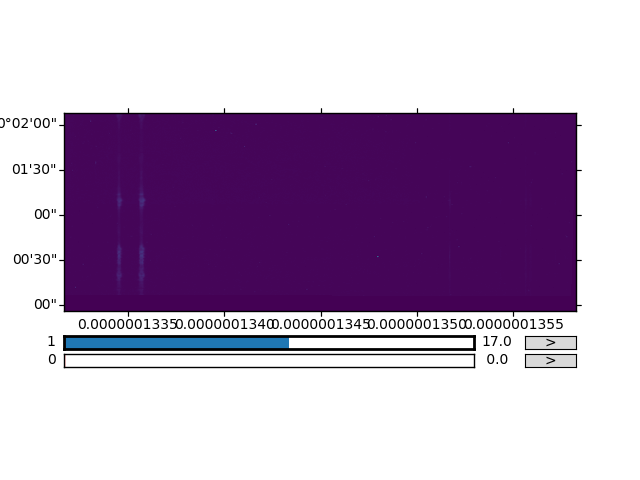

In [43]:
my_cii.plot()

By default, the y-axis corresponds to position along the slit and the x-axis to wavelength.  If the data is 4D, the bottom slider corresponds to the raster repeat axis and the top slider corresponds to the slit location axis.  Press play on a slider to animate the image.  (__Note that if you are using the stable dependencies install, the 0ths and 1st axes may have been combined into a single slider.  But the future stable dependencies install will exhibit the behaviour described above.__)

It is possible to customize the plot, e.g. change the plot axes, change the color map, add axis labels, etc. but due the basic scope of this introductory tutorial we will leave that for another day.

### Slicing/Indexing

#### 4D Slicing

Say we have a region of interest within our data between the 100th and 175th pixels along the slit at the 3rd slit position, in the wavelength range around the 75-125 pixels.  To get extract this region of interest is simply a case of slicing the ```IRISSpectrogramCubeSequence``` object.

__N.B. depending on the spectrograph files you've read in, you may need to change these index numbers to be within the ranges of your axes.  Let's start by checking the dimensionality of the IRISSpectrumCubeSequence using the ```dimensions``` property.__

In [44]:
my_cii.dimensions

(<Quantity 2. pix>,
 <Quantity 32. pix>,
 <Quantity 198. pix>,
 <Quantity 512. pix>)

In [45]:
# We can see what physical properties each axis corresponds to by using the world_axis_physical_types property.
# Note the 'meta.obs.sequence' refers to the repeat raster access.
my_cii.world_axis_physical_types

('meta.obs.sequence',
 'custom:pos.helioprojective.lon',
 'custom:pos.helioprojective.lat',
 'em.wl')

To isolate our region of interest, we can index the ```IRISSpectrogramCubeSequence``` as if it were a simple array.  This way the __data, uncertainties, mask, coordinate transformations, and relevant auxiliary data__ are sliced accordindly.  This reduces the need to perform repetitive tasks that by their repetitive nature, an lead to mistakes.

In [46]:
cii_roi = my_cii[:, 3, 100:175, 50:100]

In [47]:
cii_roi.dimensions

(<Quantity 2. pix>, <Quantity 75. pix>, <Quantity 50. pix>)

In [48]:
cii_roi.world_axis_physical_types

('meta.obs.sequence', 'custom:pos.helioprojective.lat', 'em.wl')

By looking at the ```dimensions``` and ```world_axis_physical_types```, we can see that the ```IRISSpectrogramCubeSequence``` has lost its longitude axis and the remaining axes have been sliced as requested.

__Exercise:__ Manually check the dimensionality of the data, uncertainty, etc. of the ```IRISSpectrogramCube```s within the ```IRISSpectrogramCubeSequence.data``` attribute to verify their dimensionalities been reduced correctly.

We can also use this slicing to easily plot a 1D spectrum from a single pixel.  Let's plot the pixel from the 0th raster scan, and the 30th pixel along the slit.

__N.B. Again, depending on the files you read in and the region you defined above, you may have to select a different pixel with the range of your data.__

<IPython.core.display.Javascript object>


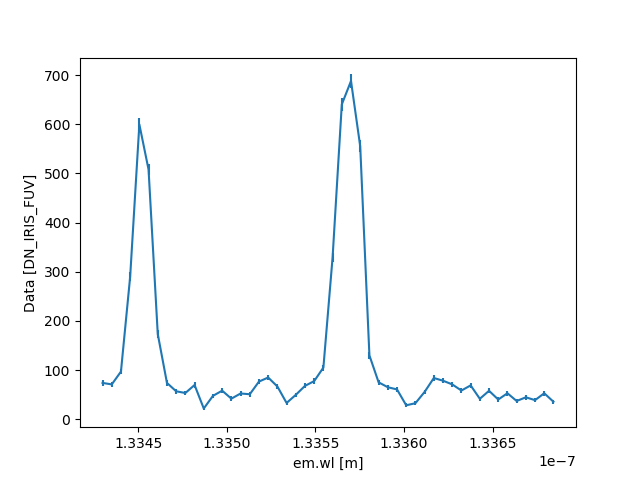

In [49]:
cii_roi[0, 30].plot()

#### 3D Slicing

Above we treated the data as though it's 4D.  But depending on our science goals and the observing campaign, it may be convenient to think of data as it were 3D, i.e. that the repeat raster and slit location axes are combined so that the exposure are simply ordered in time.  The ```IRISSpectrogramCubeSequence``` object makes this easy by providing ```cube_like``` inspection and slicing.

In [50]:
my_cii.dimensions

(<Quantity 2. pix>,
 <Quantity 32. pix>,
 <Quantity 198. pix>,
 <Quantity 512. pix>)

In [51]:
my_cii.cube_like_dimensions

<Quantity [ 64., 198., 512.] pix>

Note that the data is represented as 3D where the 0th cube-like axis has a length equal to the 0th x 1st axes' lengths.

In [52]:
my_cii.world_axis_physical_types

('meta.obs.sequence',
 'custom:pos.helioprojective.lon',
 'custom:pos.helioprojective.lat',
 'em.wl')

In [53]:
my_cii.cube_like_world_axis_physical_types

('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

Also note that the raster repeat axis has been discarded in favour of just the longitude axis alone.

We can also slice the data as though it's 3D.  Let's say we want the first 35 exposures, regardless of what raster scan and slit location they correspond to.  And also suppose we only want the 100-175 pixels along the slit and only the 50-100 pixels along the wavelength direction.  This sounds like a comples slicing operation.  But we can use the ```index_as_cube``` property to index the ```IRISSpectrogramCubeSequence``` as if it were a simple 3D array.

In [54]:
cii_roi_3d = my_cii.index_as_cube[0:35, 100:175, 50:100]

Note that the data now have the 3D dimensions we expect.

In [55]:
cii_roi_3d.cube_like_dimensions

<Quantity [35., 75., 50.] pix>

In [56]:
cii_roi_3d.cube_like_world_axis_physical_types

('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

However, also note that the data can still be represented in 4D.  In this case note that the 1st quantity, corresponding to the slit location axis, now has two values.  The 0th corresponds to the 0th raster scan.  The value is 32 showing that all slit locations are included.  The 1st, corresponding to 1st raster scan, has a value of 3, showing that only the first 3 slit locations of that raster scan were included in our cube-like slicing operation.

In [57]:
cii_roi_3d.dimensions

(<Quantity 2. pix>,
 <Quantity [32.,  3.] pix>,
 <Quantity 75. pix>,
 <Quantity 50. pix>)

In [58]:
cii_roi_3d.world_axis_physical_types

('meta.obs.sequence',
 'custom:pos.helioprojective.lon',
 'custom:pos.helioprojective.lat',
 'em.wl')

#### Cropping by Real World Coordinates

(__Currently only works for Development Dependencies Install__)

We may want to identify a region of interest based on real world coordinates, rather than pixel indices.  To do this, we can use the ```IRISSpetrogramCube.crop_by_coords``` method.  Note that this method currently only exists for ```IRISSpetrogramCube``` and not ```IRISSpetrogramCubeSequence```.  So let's try it with ```my_cii_scan0```.  To use, supply the real world coordinates of the lower corner and upper corner of the region of interest.

__(N.B. Depending on the files you read in at the start of this notebook, you may have to alter the values input to this method below.)__

In [61]:
rwc_cropped_cii_scan0 = my_cii_scan0.crop_by_coords(lower_corner=(-250*u.arcsec, 60*u.arcsec, 1334*u.angstrom), 
                                                    upper_corner=(-220*u.arcsec, 90*u.arcsec, 1335*u.angstrom))

In [62]:
rwc_cropped_cii_scan0

IRISSpectrogramCube
---------------------
OBS ID: 3690215148
OBS Description: Large sparse 32-step raster 31x120 32s  C II   Si IV   Mg II h/k Dee
OBS period: 2018-06-17 03:24:47.560000 -- 2018-06-17 04:29:24.084000

Spectrogram period: (datetime.datetime(2018, 6, 17, 3, 23, 55, 731000),) -- 2018-06-17 03:47:27.551000
Data shape: [24. 48. 21.] pix
Axis Types: ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

Note that if the data is rotated relative to the physical axes, ```crop_by_coords``` finds the smallest region aligned with the data that includes all of the region marked out by the real world coordinates supplied.

Also note that this method does not do any interpolation.  Instead it finds the pixel values corresponding to supplied real world coordinates and rounds them up or down to the nearest integer.  So a small change in the input to ```crop_by_coords``` may not affect the output.

### A Quick Tangent on Astropy Units and Quantities

Astropy units are objects representing physical units.  Astropy quantities are numbers or arrays of number which have a unit associated with them.

In [63]:
import astropy.units as u

Units often have a symbol representation and a name representation.

In [64]:
u.s

Unit("s")

In [65]:
u.second

Unit("s")

To construct a Quantity supply the Quantity contructor with number or array and unit object.

In [66]:
my_time = u.Quantity([1, 2, 3], unit=u.s)

In [67]:
my_time

<Quantity [1., 2., 3.] s>

Or multiply a number or list/array or numbers with a unit object.

In [68]:
my_distance = [20, 50, 80] * u.m

In [69]:
my_distance

<Quantity [20., 50., 80.] m>

#### Quantity Arithmetic

Quantities can be used in simple arithmetic operations.  Not only are the numbers handled but the units are changed as appropriate.

In [70]:
my_speed = my_distance / my_time

In [71]:
my_speed

<Quantity [20.        , 25.        , 26.66666667] m / s>

Quantities check unit compatibility before performing the operation and stop you doing unphysical things.

In [72]:
my_distance + my_time

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

#### Unit Convervsion

Astropy Quantities can perform valid unit conversions.  Use the ```to``` method and supply it with the unit object to which you wish to convert.

In [73]:
my_distance.to("angstrom")

<Quantity [2.e+11, 5.e+11, 8.e+11] Angstrom>

Incompatible unit conversions will raise an error.

In [74]:
my_distance.to(u.s)

UnitConversionError: 'm' (length) and 's' (time) are not convertible

### Coordinate Transformations

To get an array of real world values for every pixel along an axis for a single raster scan, say the wavelength axis (2nd axis using zero-based counting), use the ```axis_world_coordinates``` method.

Note these methods only exist for ```IRISSpectrogramCube```s.  So in this example, let's let's use the 0th raster scan from the original C II spectral window data, stored in ```my_cii_scan0```.

In [75]:
my_cii_scan0.world_axis_physical_types

('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

In [76]:
wavelength = my_cii_scan0.axis_world_coords(2)

In [77]:
wavelength

<Quantity [1.33170275e-07, 1.33175467e-07, 1.33180659e-07, 1.33185851e-07,
           1.33191043e-07, 1.33196235e-07, 1.33201427e-07, 1.33206619e-07,
           1.33211811e-07, 1.33217003e-07, 1.33222195e-07, 1.33227387e-07,
           1.33232579e-07, 1.33237771e-07, 1.33242963e-07, 1.33248155e-07,
           1.33253347e-07, 1.33258539e-07, 1.33263731e-07, 1.33268923e-07,
           1.33274115e-07, 1.33279307e-07, 1.33284499e-07, 1.33289691e-07,
           1.33294883e-07, 1.33300075e-07, 1.33305267e-07, 1.33310459e-07,
           1.33315651e-07, 1.33320843e-07, 1.33326035e-07, 1.33331227e-07,
           1.33336419e-07, 1.33341611e-07, 1.33346803e-07, 1.33351995e-07,
           1.33357187e-07, 1.33362379e-07, 1.33367571e-07, 1.33372763e-07,
           1.33377955e-07, 1.33383147e-07, 1.33388339e-07, 1.33393531e-07,
           1.33398723e-07, 1.33403915e-07, 1.33409107e-07, 1.33414299e-07,
           1.33419491e-07, 1.33424683e-07, 1.33429875e-07, 1.33435067e-07,
           1.33440259e-07

In [78]:
wavelength.shape, my_cii_scan0.dimensions[-1]

((512,), <Quantity 512. pix>)

In [79]:
type(wavelength)

astropy.units.quantity.Quantity

Note that the output is an astropy quantity with the same length as the wavelength axis.

You can also use a substring of the ```world_axis_physical_types``` label for the axis.

In [80]:
my_cii_scan0.world_axis_physical_types

('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

In [81]:
my_cii_scan0.axis_world_coords("wl")

<Quantity [1.33170275e-07, 1.33175467e-07, 1.33180659e-07, 1.33185851e-07,
           1.33191043e-07, 1.33196235e-07, 1.33201427e-07, 1.33206619e-07,
           1.33211811e-07, 1.33217003e-07, 1.33222195e-07, 1.33227387e-07,
           1.33232579e-07, 1.33237771e-07, 1.33242963e-07, 1.33248155e-07,
           1.33253347e-07, 1.33258539e-07, 1.33263731e-07, 1.33268923e-07,
           1.33274115e-07, 1.33279307e-07, 1.33284499e-07, 1.33289691e-07,
           1.33294883e-07, 1.33300075e-07, 1.33305267e-07, 1.33310459e-07,
           1.33315651e-07, 1.33320843e-07, 1.33326035e-07, 1.33331227e-07,
           1.33336419e-07, 1.33341611e-07, 1.33346803e-07, 1.33351995e-07,
           1.33357187e-07, 1.33362379e-07, 1.33367571e-07, 1.33372763e-07,
           1.33377955e-07, 1.33383147e-07, 1.33388339e-07, 1.33393531e-07,
           1.33398723e-07, 1.33403915e-07, 1.33409107e-07, 1.33414299e-07,
           1.33419491e-07, 1.33424683e-07, 1.33429875e-07, 1.33435067e-07,
           1.33440259e-07

#### Dependent Axes

Note that not all axes are independent, like wavelength in the above example.  Some are dependent on others, for example, latitude and longitude.  Depending on the latitude you're at, the longitude value at certain pixel along the longitude axis will have a different value.

In [82]:
lon = my_cii_scan0.axis_world_coords("lon")

In [83]:
lon

<Quantity [[-0.06751967, -0.06751758, -0.0675155 , ..., -0.0671133 ,
            -0.06711122, -0.06710914],
           [-0.06724254, -0.06724046, -0.06723837, ..., -0.06683618,
            -0.06683409, -0.06683201],
           [-0.06696541, -0.06696333, -0.06696125, ..., -0.06655905,
            -0.06655697, -0.06655488],
           ...,
           [-0.05948299, -0.05948091, -0.05947882, ..., -0.05907663,
            -0.05907454, -0.05907246],
           [-0.05920587, -0.05920378, -0.0592017 , ..., -0.0587995 ,
            -0.05879742, -0.05879533],
           [-0.05892874, -0.05892665, -0.05892457, ..., -0.05852237,
            -0.05852029, -0.0585182 ]] deg>

In [84]:
my_cii_scan0.dimensions

<Quantity [ 32., 198., 512.] pix>

In [85]:
lon.shape

(32, 198)

Note how the dimensionality of the longitude quantity is the same as the longitude axis x the latitude axis.  The same would be true if we asked for the latitude.

Multiple axis labels/indices can be entered and multiple arrays are returned.  Entering no arguments causes real world coordinates for all axis to be returned.  In these cases a tuple of quantities is returned.

In [86]:
all_world_coords = my_cii_scan0.axis_world_coords()

In [87]:
all_world_coords

(<Quantity [[-0.06751967, -0.06751758, -0.0675155 , ..., -0.0671133 ,
             -0.06711122, -0.06710914],
            [-0.06724254, -0.06724046, -0.06723837, ..., -0.06683618,
             -0.06683409, -0.06683201],
            [-0.06696541, -0.06696333, -0.06696125, ..., -0.06655905,
             -0.06655697, -0.06655488],
            ...,
            [-0.05948299, -0.05948091, -0.05947882, ..., -0.05907663,
             -0.05907454, -0.05907246],
            [-0.05920587, -0.05920378, -0.0592017 , ..., -0.0587995 ,
             -0.05879742, -0.05879533],
            [-0.05892874, -0.05892665, -0.05892457, ..., -0.05852237,
             -0.05852029, -0.0585182 ]] deg>,
 <Quantity [[-0.00099777, -0.00081295, -0.00062813, ...,  0.03504242,
              0.03522724,  0.03541207],
            [-0.00100089, -0.00081607, -0.00063125, ...,  0.0350393 ,
              0.03522412,  0.03540894],
            [-0.00100402, -0.0008192 , -0.00063438, ...,  0.03503617,
              0.03522099,  

#### Pixel to World & World to Pixel

If you want to convert the other way, from world coordinates to pixels, or are interested in only a subset of pixels and want a little more efficiency, you can use the ```pixel_to_world``` and ```world_to_pixel``` methods.

Let's convert just the (0, 0, 0) pixel to world coordinates.

In [88]:
my_cii_scan0.pixel_to_world(u.Quantity([0], unit=u.pix), 
                            u.Quantity([0], unit=u.pix), 
                            u.Quantity([0], unit=u.pix))

[<Quantity [-0.06751967] deg>,
 <Quantity [-0.00099777] deg>,
 <Quantity [1.33170275e-07] m>]

Let's now take that output and convert back to pixel coordinates.

In [90]:
my_cii_scan0.world_to_pixel(-0.06751967*u.deg, -0.00099777*u.deg, 1.33170275e-07*u.m)

[<Quantity -7.67457198e-06 pix>,
 <Quantity -5.63684941e-06 pix>,
 <Quantity -2.88905508e-06 pix>]

Notice that within numerical error, we can got back to (0, 0, 0) in pixel space.

As many pixels as you like can be entered to the ```pixel_to_world``` and ```world_to_pixel``` methods.  For example, let's also convert the (7, 7, 7) pixel:

In [91]:
my_cii_scan0.pixel_to_world(u.Quantity([0, 7], unit=u.pix), 
                            u.Quantity([0, 7], unit=u.pix), 
                            u.Quantity([0, 7], unit=u.pix))

[<Quantity [-0.06751967, -0.06556519] deg>,
 <Quantity [-0.00099777,  0.00027411] deg>,
 <Quantity [1.33170275e-07, 1.33206619e-07] m>]

## SJI

Let's now explore the tools available for handling SJI data.

### Reading FITS files

In [93]:
from irispy.sji import read_iris_sji_level2_fits

SyntaxError: invalid syntax (sji.py, line 477)

In [94]:
# Define a single SJI filename here.
my_sji_file = "iris_l2_20180617_032355_3690215148_SJI_1330_t000.fits"

In [95]:
# Enter the file name into the SJI FITS reader.
my_sji = read_iris_sji_level2_fits(my_sji_file)

NameError: name 'read_iris_sji_level2_fits' is not defined

### Structure of the IRISMapCube Class

In this case, we will assume you have entered a single file and so we have produce an ```IRISMapCube```.

In [ ]:
my_sji

Access the data, uncertainties, mask, unit, WCS transformation, metadata and auxiliary data via the following attributes, just like with the ```IRISSpectrogramCube```.

__(The code is uncommented to avoid large print outs to the screen.  Uncomment and run to see the output.)__

In [ ]:
#my_sji.data

In [ ]:
#my_sji.uncertainty

In [ ]:
#my_sji.mask

In [ ]:
#my_sji.unit

In [ ]:
#my_sji.wcs

In [ ]:
#my_sji.meta

In [ ]:
#my_sji.extra_coords

### Inspecting the Data

Analaogous methods and properties to those of the ```IRISSpectrogramCube``` class for inspecting the data also exists for ```IRISMapCube```.

In [ ]:
my_sji

In [ ]:
my_sji.dimensions

In [ ]:
my_sji.world_axis_physical_types

We can produce a movie using the plot method.

In [ ]:
my_sji.plot()

Again, customizing this plot is possible, but not explained here.

### Slicing/Indexing

Say we want have a region of interest within our data between the 10th and 20th frames in time and between the 50th and 150th pixel in the longitude-direction and the 75th and 175th in the latitude-direction.

In [ ]:
sji_roi = my_sji[10:20, 50:150, 75:175]

In [ ]:
sji_roi.dimensions

In [ ]:
sji_roi.world_axis_physical_types

In [ ]:
sji_roi.plot()

### Exposure Time Correction

In [ ]:
sji_roi.unit

In [ ]:
sji_roi = sji_roi.apply_exposure_time_correction()

In [ ]:
sji_roi.unit

In [ ]:
sji_roi = sji_roi.apply_exposure_time_correction(undo=True)

In [ ]:
sji_roi.unit

### Dust Mask

The ```IRISMapCube``` has a method that enables you to mask or unmask pixels which are affected by dust.  This is similar to the dustbuster routine in SSW except that it doesn't interpolate the data in the dusty pixels.  It simply identifies them in the mask.  To mask the dusty pixels, do:

In [92]:
my_sji.apply_dust_mask()

NameError: name 'my_sji' is not defined

To unmask dusty pixels, do:

In [ ]:
my_sji.apply_dust_mask(undo=True)